# 신한데이터 기술통계 추론통계
- 신한데이터는 공모전 이후 보안 서약서에 따라 폐기함
- 기술통계
- 추론 통계

In [54]:
#install.packages("corrplot")

In [62]:
#install.packages("rpart")

In [89]:
#install.packages("doBy")

In [1]:
#install.packages("tidymodels")

In [1]:
#install.packagesges("ranger")

In [2]:
#install.packages("yardstick")

In [257]:
# install.packages('randomForestExplainer')
# library('randomForestExplainer')

In [270]:
# install.packages("cluster")
# install.packages("compareGroups")
# install.packages("NbClust")
# install.packages("sparcl")
# install.packages("HDclassif")
# install.packages("factoextra")

In [364]:
# install.packages("e1071")
# install.packages("ROCR")

In [271]:
#install.packages("caret")

In [167]:
#라이브러리
library(cluster) 
library(compareGroups) 
library(NbClust) 
library(sparcl) 
library(HDclassif) 
library(factoextra) 
library(e1071)
library(ROCR)

In [168]:
#라이브러리
library(readxl)
library(ranger)
library(ggplot2)
library(dplyr)
library(MASS)
library(corrplot)
library(rpart)
library(doBy)
library(tidyverse)
library('tidymodels')
library(yardstick)
library(caret)

In [169]:
#난수 설정
set.seed(1712)

In [170]:
#너무 높게 나와서 지수로 올거 대비
options("scipen"=100)

In [173]:
# df_2020<-read_excel('data/real/test1.xlsx',col_names = TRUE)

In [174]:
# head(df_2020)

## 각 달별로 분리하기
- 0~1변환

In [175]:
# df_2001<-df_2020  %>%  filter(df_2020$V8==202001)
# df_2002<-df_2020  %>%  filter(df_2020$V8==202002)
# df_2003<-df_2020  %>%  filter(df_2020$V8==202003)
# df_2004<-df_2020  %>%  filter(df_2020$V8==202004)
# df_2005<-df_2020  %>%  filter(df_2020$V8==202005)
# df_2006<-df_2020  %>%  filter(df_2020$V8==202006)

In [176]:
#write.csv(df_2001,file='2001.csv')
#write.csv(df_2002,file='2002.csv')
#write.csv(df_2003,file='2003.csv')
#write.csv(df_2004,file='2004.csv')
#write.csv(df_2005,file='2005.csv')
#write.csv(df_2006,file='2006.csv')

In [178]:
#head(df_2001)

In [29]:
#t.test(data=travel_data,V4~V6,var.equal = T)

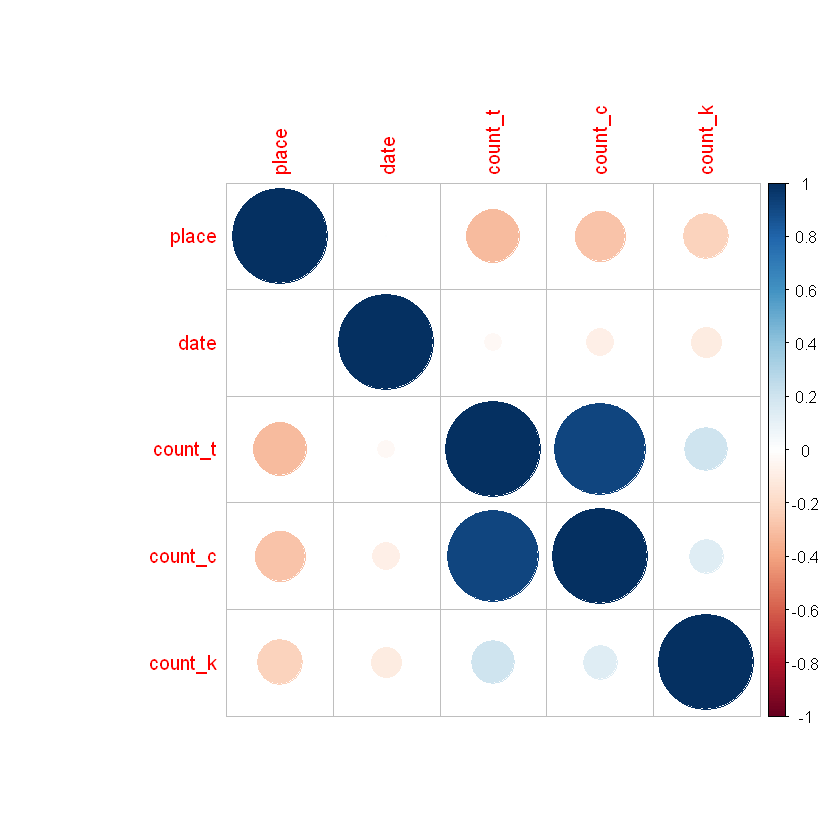

In [164]:
corrplot(travel_cor)

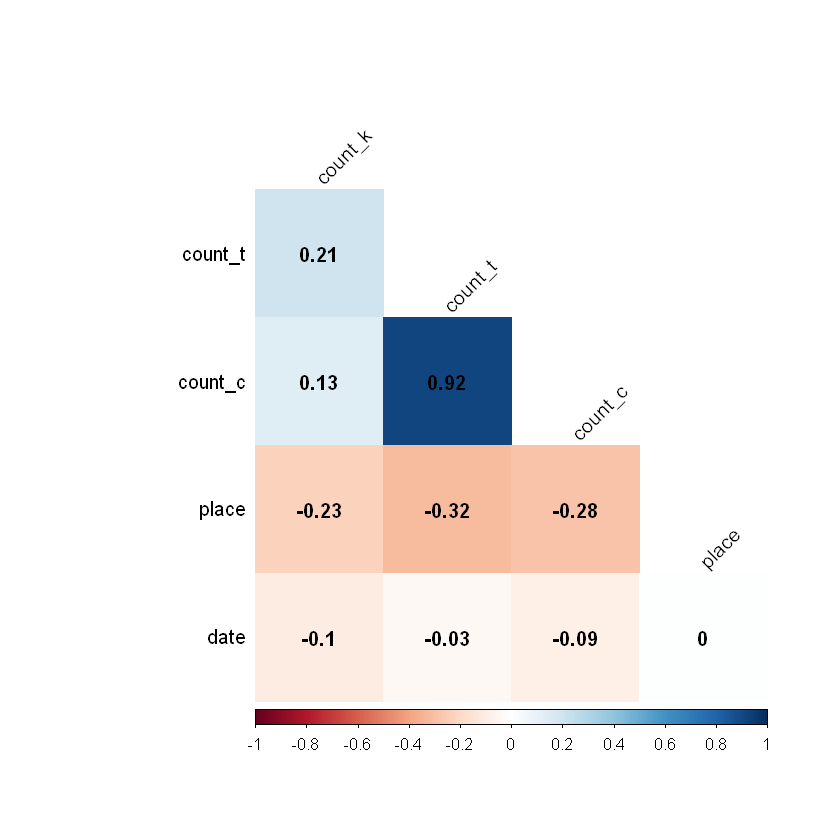

In [166]:
#상관관계 군집별로 그래프 내림차순 정렬
corrplot(travel_cor,
        method="color",
        type="lower",
        order="hclust",
        addCoef.col="black",
        tl.col="black",
        tl.srt=45,
        diag=F)

# 의사결정 나무 알고리즘-rpart
- 분류 분석

## data sampling= training/test 데이터 분리

# 여기서 부터
- 분석기법 랜덤포레스트 사용
- ROC 그래프로 설명 까지

In [95]:
#신한 데이터+코로나 정보 데이터 합친거 불러온거
dt_2020<-read_excel('data/real/project_dataset.xlsx',col_names = TRUE)

In [71]:
head(dt_2020)

v1,v2,v3,v4,v5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
강원,202001,7064,1010131,0
강원,202002,5998,626032,6
강원,202003,4775,400085,31
강원,202004,5159,480581,12
강원,202005,6428,652450,3
강원,202006,6090,624451,0


In [96]:
#변수 변경
dt_20<-rename(dt_2020,'place'='v1',
             'date'='v2',
             'count_t'='v3',
             'count_c'='v4',
             'count_k'='v5')

In [97]:
head(dt_20)

place,date,count_t,count_c,count_k
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
강원,202001,7064,1010131,0
강원,202002,5998,626032,6
강원,202003,4775,400085,31
강원,202004,5159,480581,12
강원,202005,6428,652450,3
강원,202006,6090,624451,0


In [98]:
# 문자를 숫자로 바꾸기 위해 정렬한후 시 별로 숫자 부여
dt_20$place<-ifelse(dt_20$place=='강원',100,
                       ifelse(dt_20$place=='경기',101,
                              ifelse(dt_20$place=='경남',102,
                                     ifelse(dt_20$place=='경북',103,
                                            ifelse(dt_20$place=='광주',104,
                                                   ifelse(dt_20$place=='대구',105,
                                                          ifelse(dt_20$place=='대전',106,
                                                                 ifelse(dt_20$place=='부산',107,
                                                                        ifelse(dt_20$place=='서울',108,
                                                                               ifelse(dt_20$place=='세종',109,
                                                                                      ifelse(dt_20$place=='울산',110,
                                                                                             ifelse(dt_20$place=='인천',111,
                                                                                                    ifelse(dt_20$place=='전남',112,
                                                                                                           ifelse(dt_20$place=='전북',113,
                                                                                                                  ifelse(dt_20$place=='제주',114,
                                                                                                                         ifelse(dt_20$place=='충남',115,116))))))))))))))))

In [99]:
#머신런닝 용을 위해 다른 변수에 추가
cya_pre<-dt_20

In [100]:
#확인
head(dt_20)

place,date,count_t,count_c,count_k
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100,202001,7064,1010131,0
100,202002,5998,626032,6
100,202003,4775,400085,31
100,202004,5159,480581,12
100,202005,6428,652450,3
100,202006,6090,624451,0


In [101]:
#확인 2
head(cya_pre)

place,date,count_t,count_c,count_k
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100,202001,7064,1010131,0
100,202002,5998,626032,6
100,202003,4775,400085,31
100,202004,5159,480581,12
100,202005,6428,652450,3
100,202006,6090,624451,0


In [79]:
dt_20  %>% 
    initial_split(prop=0.7)->cya_split

In [80]:
#학습 72 시험 30 전체 102
cya_split

<Analysis/Assess/Total>
<72/30/102>

In [102]:
#학습용 데이터 확인
cya_split %>%
  training()

place,date,count_t,count_c,count_k
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100,202001,7064,1010131,0
100,202002,5998,626032,6
100,202003,4775,400085,31
100,202004,5159,480581,12
100,202005,6428,652450,3
100,202006,6090,624451,0
101,202001,16810,5544247,2
101,202002,14948,3326132,82
101,202003,13143,2195995,417


In [103]:
#test 용데이터 확인
cya_split %>%
  training()

place,date,count_t,count_c,count_k
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
101,202004,14202,2714775,177
101,202005,16454,3698148,151
102,202005,7633,785159,6
103,202004,5577,425471,69
103,202006,6717,662845,0
104,202002,4828,332626,9
104,202003,3653,246825,15
104,202004,4107,298702,6
105,202004,5193,423947,0


# 결과는 확진자 그 외의 변수는 예측에 사용
- 그전에 결측값,이상점은 제거

In [104]:
cya_split %>% training() %>%
  recipe(count_k~place+date+count_c+count_t)

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

In [116]:
cya_split %>% training() %>%
  recipe(count_t~place+date+count_c+count_k) %>%
  step_corr(all_predictors()) %>%     #상관관계 큰 변수 제거
  step_center(all_predictors(), -all_outcomes()) %>%    #평균을 0으로 하는 척도
  step_scale(all_predictors(), -all_outcomes()) %>%     # 위와 동일
  prep() -> cya_recipe

In [119]:
#상관관계가 높아서 제거된 변수 x
# 나머지 변수에 대한 중심화,척도화 작업 필요
cya_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Training data contained 72 data points and no missing data.

Operations:

Correlation filter removed no terms [trained]
Centering for place, date, count_c, count_k [trained]
Scaling for place, date, count_c, count_k [trained]

In [120]:
#receipe 패키지에서 시험용 데이터 처리 함수 bake사용
cya_recipe %>%
  bake(cya_split %>% testing()) -> cya_testing

In [121]:
#위와 다른 결과
cya_testing

place,date,count_c,count_k,count_t
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-1.35500434,0.4325054,1.535185627,1.30022115,14202
-1.35500434,1.0091792,2.387303540,1.06254769,16454
-1.15508566,1.0091792,-0.136876100,-0.26293897,7633
-0.95516699,0.4325054,-0.448554973,0.31296213,5577
-0.95516699,1.5858530,-0.242864317,-0.31778670,6717
-0.75524832,-0.7208423,-0.529007545,-0.23551511,4828
-0.75524832,-0.1441685,-0.603356311,-0.18066739,3653
-0.75524832,0.4325054,-0.558403561,-0.26293897,4107
-0.55532965,0.4325054,-0.449875558,-0.31778670,5193


In [122]:
#학습용 데이터에 쓸 함수 juice()
cya_recipe %>%
  juice() -> cya_training

In [123]:
rand_forest(trees=100, mode='regression') %>%
  set_engine('randomForest') %>%
  fit(count_t~place+date+count_c+count_k,data=cya_training) -> cya_rf

In [124]:
cya_rf

parsnip model object

Fit time:  20ms 

Call:
 randomForest(x = as.data.frame(x), y = y, ntree = ~100) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 1

          Mean of squared residuals: 2087074
                    % Var explained: 83.04

In [125]:
# cya_rf %>%
#   predict(cya_testing)

In [114]:
cya_rf %>%
  predict(cya_testing) %>%
  bind_cols(cya_testing)

.pred,place,date,count_c,count_k,count_t
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12463.742,-1.35500434,0.4325054,1.535185627,1.30022115,14202
12809.770,-1.35500434,1.0091792,2.387303540,1.06254769,16454
6928.506,-1.15508566,1.0091792,-0.136876100,-0.26293897,7633
6164.348,-0.95516699,0.4325054,-0.448554973,0.31296213,5577
6658.863,-0.95516699,1.5858530,-0.242864317,-0.31778670,6717
5349.018,-0.75524832,-0.7208423,-0.529007545,-0.23551511,4828
4805.595,-0.75524832,-0.1441685,-0.603356311,-0.18066739,3653
4812.021,-0.75524832,0.4325054,-0.558403561,-0.26293897,4107
5641.206,-0.55532965,0.4325054,-0.449875558,-0.31778670,5193


## 여행자수 기준
- 결정계수 0.83
- 생각보다 좋게 나옴

In [115]:
cya_rf %>%
  predict(cya_testing) %>%
  bind_cols(cya_testing) %>%
  metrics(truth=count_t, estimate=.pred)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1332.788490
rsq,standard,0.898386
mae,standard,1016.942256


## 1월달을 기준으로 다음 모델 예측하기

In [129]:
cya_pre %>%
  recipe(count_k~place+date+count_c+count_t) %>%
  step_corr(all_predictors()) %>%
  step_center(all_predictors(), -all_outcomes()) %>%
  step_scale(all_predictors(), -all_outcomes()) %>%
  prep() -> cya_recipe2

In [130]:
cya_recipe2 %>%
  bake(cya_pre) -> cya_testing_pre

In [131]:
cya_recipe2 %>%
  juice() -> cya_training_pre

In [135]:
cya_training_pre

place,date,count_t,count_k
<dbl>,<dbl>,<dbl>,<dbl>
-1.6249686,-1.4566567,0.11627615,0
-1.6249686,-0.8739940,-0.19175012,6
-1.6249686,-0.2913313,-0.54514236,31
-1.6249686,0.2913313,-0.43418355,12
-1.6249686,0.8739940,-0.06749937,3
-1.6249686,1.4566567,-0.16516624,0
-1.4218475,-1.4566567,2.93243377,2
-1.4218475,-0.8739940,2.39439914,82
-1.4218475,-0.2913313,1.87283496,417


In [136]:
rand_forest(trees=100, mode='regression') %>%
  set_engine('randomForest', localImp=TRUE) %>%
  fit(count_k~place+date+count_t, data=cya_training_pre) -> cya_rf2

## 여기서 어떻게 적용할지

In [142]:
cya_rf2 %>%
  predict(cya_testing_pre) %>%
  bind_cols(cya_pre)

.pred,place,date,count_t,count_c,count_k
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
24.792428,100,202001,7064,1010131,0
66.749357,100,202002,5998,626032,6
116.806337,100,202003,4775,400085,31
55.897402,100,202004,5159,480581,12
16.953275,100,202005,6428,652450,3
8.929306,100,202006,6090,624451,0
77.126071,101,202001,16810,5544247,2
127.526659,101,202002,14948,3326132,82
228.819899,101,202003,13143,2195995,417


In [161]:
#코로나 확진자 수 예측  내림차수 예측
cya_rf2 %>%
  predict(cya_testing_pre) %>%
  bind_cols(cya_pre) %>%
  group_by(place, date)  %>% 
  mutate(rank=rank(-.pred))  %>% 
  arrange(.pred)

.pred,place,date,count_t,count_c,count_k,rank
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3935238,114,202006,2521,220837,0,1
0.6346667,109,202006,2601,175751,0,1
0.8772500,110,202006,4439,408648,0,1
1.0223333,105,202006,6348,640041,0,1
1.1606667,116,202006,6639,609475,0,1
1.2230000,113,202006,5148,426697,0,1
1.2970000,112,202006,5212,443966,0,1
1.3986045,114,202001,3373,328699,0,1
1.7810807,109,202001,3131,252659,0,1


In [138]:
#예측를 위한 모델 설명표
cya_rf2

parsnip model object

Fit time:  20ms 

Call:
 randomForest(x = as.data.frame(x), y = y, ntree = ~100, localImp = ~TRUE) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 1

          Mean of squared residuals: 8836.481
                    % Var explained: 12.95

## 제주-세종-울산-대구 순으로 증가 전망!